- ***Kernel Status : In progress***

- ***Features***
    - The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

    - There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.


- ***Description of features***
    - ***geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int):*** geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
    - ***count_floors_pre_eq (type: int):*** number of floors in the building before the earthquake.
    - ***age (type: int):*** age of the building in years.
    - ***area_percentage (type: int):*** normalized area of the building footprint.
    - ***height_percentage (type: int):*** normalized height of the building footprint.
    - ***land_surface_condition (type: categorical):*** surface condition of the land where the building was built. Possible values: n, o, t.
    - ***foundation_type (type: categorical):*** type of foundation used while building. Possible values: h, i, r, u, w.
    - ***roof_type (type: categorical):*** type of roof used while building. Possible values: n, q, x.
    - ***ground_floor_type (type: categorical):*** type of the ground floor. Possible values: f, m, v, x, z.
    - ***other_floor_type (type: categorical):*** type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
    - ***position (type: categorical):*** position of the building. Possible values: j, o, s, t.
    - ***plan_configuration (type: categorical):*** building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
    - ***has_superstructure_adobe_mud (type: binary):*** flag variable that indicates if the superstructure was made of Adobe/Mud.
    - ***has_superstructure_mud_mortar_stone (type: binary):*** flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
    - ***has_superstructure_stone_flag (type: binary):*** flag variable that indicates if the superstructure was made of Stone.
    - ***has_superstructure_cement_mortar_stone (type: binary):*** flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
    - ***has_superstructure_mud_mortar_brick (type: binary):*** flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
    - ***has_superstructure_cement_mortar_brick (type: binary):*** flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
    - ***has_superstructure_timber (type: binary):*** flag variable that indicates if the superstructure was made of Timber.
    - ***has_superstructure_bamboo (type: binary):*** flag variable that indicates if the superstructure was made of Bamboo.
    - ***has_superstructure_rc_non_engineered (type: binary):*** flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
    - ***has_superstructure_rc_engineered (type: binary):*** flag variable that indicates if the superstructure was made of engineered reinforced concrete.
    - ***has_superstructure_other (type: binary):*** flag variable that indicates if the superstructure was made of any other material.
    - ***legal_ownership_status (type: categorical):*** legal ownership status of the land where building was built. Possible values: a, r, v, w.
    - ***count_families (type: int):*** number of families that live in the building.
    - ***has_secondary_use (type: binary):*** flag variable that indicates if the building was used for any secondary purpose.
    - ***has_secondary_use_agriculture (type: binary):*** flag variable that indicates if the building was used for agricultural purposes.
    - ***has_secondary_use_hotel (type: binary):*** flag variable that indicates if the building was used as a hotel.
    - ***has_secondary_use_rental (type: binary):*** flag variable that indicates if the building was used for rental purposes.
    - ***has_secondary_use_institution (type: binary):*** flag variable that indicates if the building was used as a location of any institution.
    - ***has_secondary_use_school (type: binary):*** flag variable that indicates if the building was used as a school.
    - ***has_secondary_use_industry (type: binary):*** flag variable that indicates if the building was used for industrial purposes.
    - ***has_secondary_use_health_post (type: binary):*** flag variable that indicates if the building was used as a health post.
    - ***has_secondary_use_gov_office (type: binary):*** flag variable that indicates if the building was used fas a government office.
    - ***has_secondary_use_use_police (type: binary):*** flag variable that indicates if the building was used as a police station.
    - ***has_secondary_use_other (type: binary):*** flag variable that indicates if the building was secondarily used for other purposes.

## Importing liabraries

In [8]:
#importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Reading Dataset

In [9]:
train=pd.read_csv("train_values.csv")
labels=pd.read_csv("train_labels.csv")
test=pd.read_csv("test_values.csv")
train["damage_grade"]=labels["damage_grade"]
print("shape of the train dataset is : ",train.shape)
print("shape of the test dataset is  : ",test.shape)

shape of the train dataset is :  (260601, 40)
shape of the test dataset is  :  (86868, 39)


In [10]:
train.head(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
5,333020,8,558,6089,2,10,9,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,2
6,728451,9,475,12066,2,25,3,4,n,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
7,475515,20,323,12236,2,0,8,6,t,w,q,v,x,s,u,0,0,0,0,0,1,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
8,441126,0,757,7219,2,15,8,6,t,r,q,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
9,989500,26,886,994,1,0,13,4,t,i,n,v,j,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1


In [12]:
# exploring the statstical fearures of train dataset.
train.describe().T.style.background_gradient(cmap='Set2',low =0.4,high=0.1,axis=0)

,count,mean,std,min,25%,50%,75%,max
building_id,260601.000000,525675.482773,304544.999032,4.000000,261190.000000,525757.000000,789762.000000,1052934.000000
geo_level_1_id,260601.000000,13.900353,8.033617,0.000000,7.000000,12.000000,21.000000,30.000000
geo_level_2_id,260601.000000,701.074685,412.710734,0.000000,350.000000,702.000000,1050.000000,1427.000000
geo_level_3_id,260601.000000,6257.876148,3646.369645,0.000000,3073.000000,6270.000000,9412.000000,12567.000000
count_floors_pre_eq,260601.000000,2.129723,0.727665,1.000000,2.000000,2.000000,2.000000,9.000000
age,260601.000000,26.535029,73.565937,0.000000,10.000000,15.000000,30.000000,995.000000
area_percentage,260601.000000,8.018051,4.392231,1.000000,5.000000,7.000000,9.000000,100.000000
height_percentage,260601.000000,5.434365,1.918418,2.000000,4.000000,5.000000,6.000000,32.000000
has_superstructure_adobe_mud,260601.000000,0.088645,0.284231,0.000000,0.000000,0.000000,0.000000,1.000000
has_superstructure_mud_mortar_stone,260601.000000,0.761935,0.425900,0.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# exploring the statstical fearures of train dataset (object).
train.describe(include="object").T

,count,unique,top,freq
land_surface_condition,260601,3,t,216757
foundation_type,260601,5,r,219196
roof_type,260601,3,n,182842
ground_floor_type,260601,5,f,209619
other_floor_type,260601,4,q,165282
position,260601,4,s,202090
plan_configuration,260601,10,d,250072
legal_ownership_status,260601,4,v,250939


In [14]:
# checking the types of varibles in the dataset(int,float,object)
dtypes=pd.DataFrame(train.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=train.nunique()
dtypes["Null Values"]=train.isnull().sum()
dtypes["% null Values"]=train.isnull().sum()/len(train)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
building_id,int64,260601,0,0.000000
geo_level_1_id,int64,31,0,0.000000
geo_level_2_id,int64,1414,0,0.000000
geo_level_3_id,int64,11595,0,0.000000
count_floors_pre_eq,int64,9,0,0.000000
age,int64,42,0,0.000000
area_percentage,int64,84,0,0.000000
height_percentage,int64,27,0,0.000000
land_surface_condition,object,3,0,0.000000
foundation_type,object,5,0,0.000000


### ***Damage Grade***

In [15]:
# checking the dependent variable --> `damage_grade`
plt.figure(figsize=(10,8))
ax=sns.countplot("damage_grade",data=train)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.title("Damage Grade")
plt.show()  
train["damage_grade"].dropna().astype(int).value_counts().plot.pie(autopct="%.1f%%", 
                                                    shadow=True,rotatelabels=True,
                                                    wedgeprops={'linewidth': 6},
                                                    radius=2
                                                    )
plt.legend(["Low Damage","Avg damage","High damage"])
plt.show()

TypeError: countplot() got multiple values for argument 'data'

<Figure size 1000x800 with 0 Axes>

 - ***OBSERVATIONS***
    - 1: represents low damage
    - 2: represents a medium amount of damage
    - 3: represents almost complete destruction
    - `9.61%` of bulidings were less damaged by earthquake.
    - `56.9%` of bulidings were medium damaged 
    - `33.48%` of bulidings were highly damaged due to earthquake.

### ***Now we will see if the age of the building affect on damage due to earthquake ?***

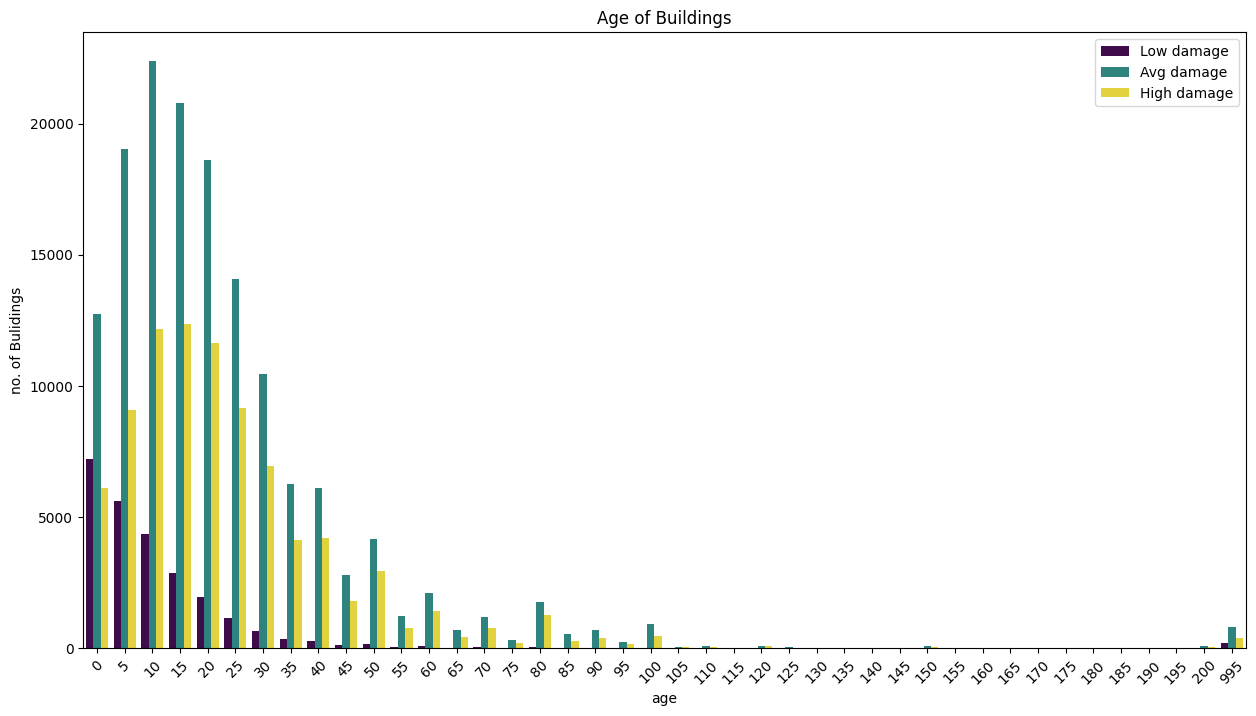

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x=train["age"],hue=train["damage_grade"],palette="viridis")
plt.ylabel("no. of Bulidings")
plt.title("Age of Buildings")
plt.legend(["Low damage","Avg damage","High damage"],loc="upper right")
plt.xticks(rotation=45)
plt.show()

- ***OBSERVATIONS***
    - Age of majority of the bulidings is between 0-50 years,more than 90% of the houses fall under this range.
    - 2nd highest no. of bulidings are in the category high damage.
    - Hence,The above chart infers that despite the age of building ,most of the time the damage caused to the building is Average damage. 
    

### ***Does the area of buliding affect on damage caused due to earthquake ?***

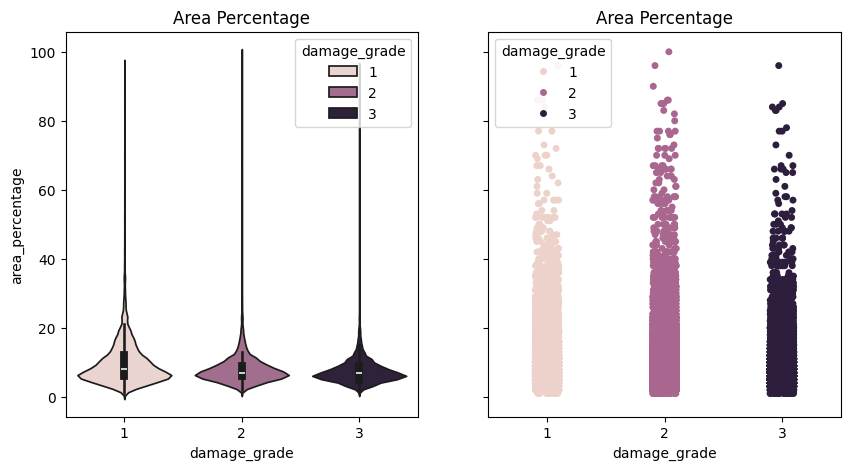

<Figure size 1000x900 with 0 Axes>

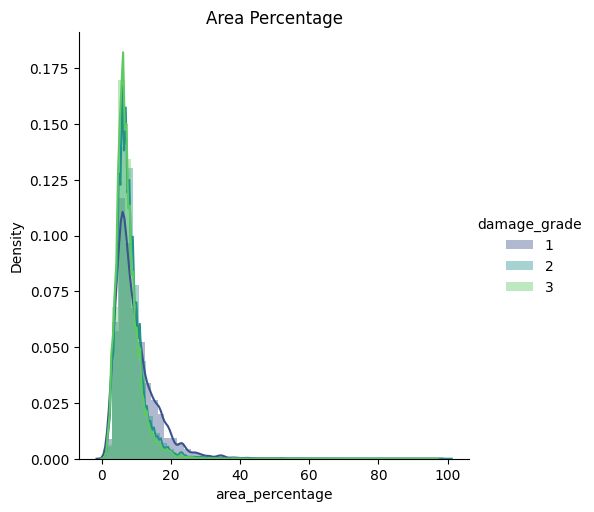

In [17]:
fig,ax=plt.subplots(1,2,figsize=(10,5), sharey=True)
###############################################################
#                      Violin plot                            #
###############################################################

sns.violinplot(data=train,x='damage_grade',y='area_percentage',hue='damage_grade',
                   split=False,ax=ax[0])

sns.stripplot(data=train,x='damage_grade',y='area_percentage',hue='damage_grade',jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("Area Percentage")
ax[1].set_title("Area Percentage")
plt.show()
###############################################################
#                       Facet Grid                            #
###############################################################

plt.figure(figsize=(10,9))
sns.FacetGrid(train,hue='damage_grade',height=5,palette="viridis")\
    .map(sns.distplot,'area_percentage')\
    .add_legend()
plt.title("Area Percentage")
plt.show()

- ***OBSERVATIONS***
    - The above plots infers that as the area of the buliding increases the damaged caused to it also increases. 

### ***Does the height of buliding affect on damage caused due to earthquake ?***

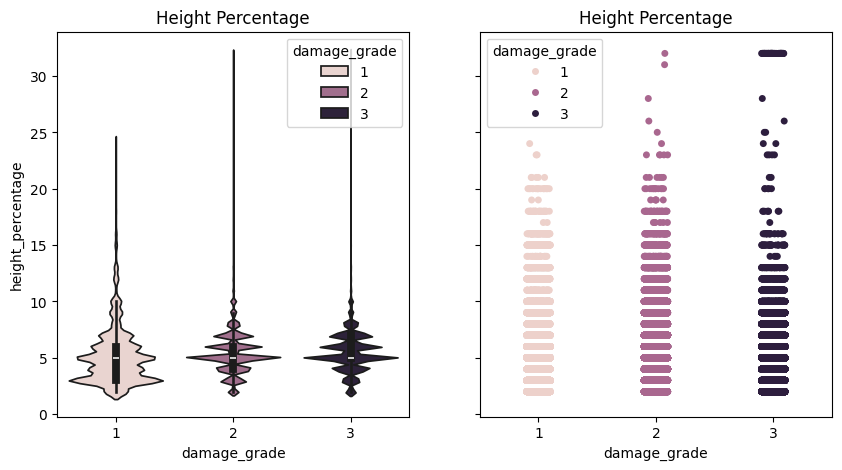

<Figure size 1000x500 with 0 Axes>

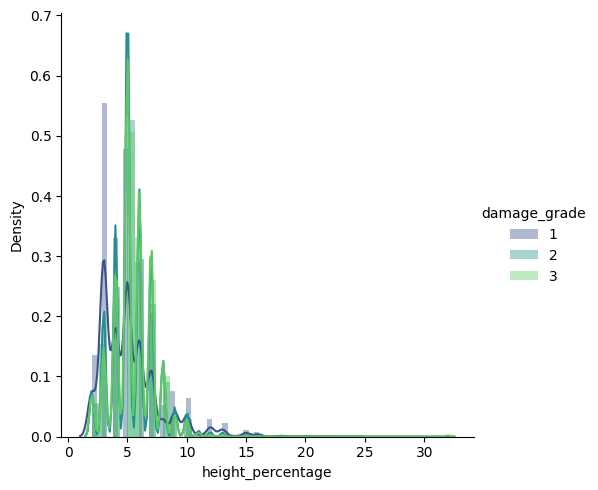

In [18]:
fig,ax=plt.subplots(1,2,figsize=(10,5), sharey=True)
###############################################################
#                      Violin plot                            #
###############################################################

sns.violinplot(data=train,x='damage_grade',y='height_percentage',hue='damage_grade',
                   split=False,ax=ax[0])

sns.stripplot(data=train,x='damage_grade',y='height_percentage',hue='damage_grade',jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("Height Percentage")
ax[1].set_title("Height Percentage")
plt.show()
###############################################################
#                       Facet Grid                            #
###############################################################
plt.figure(figsize=(10,5))
sns.FacetGrid(train,hue='damage_grade',height=5,palette="viridis")\
    .map(sns.distplot,'height_percentage')\
    .add_legend()
plt.show()

 - ***OBSERVATIONS***
    - The above plots infers that as the height of the buliding increases the damaged caused to it also increases.

### ***Do number of floors in the buliding affect on damage caused due to earthquake ?***

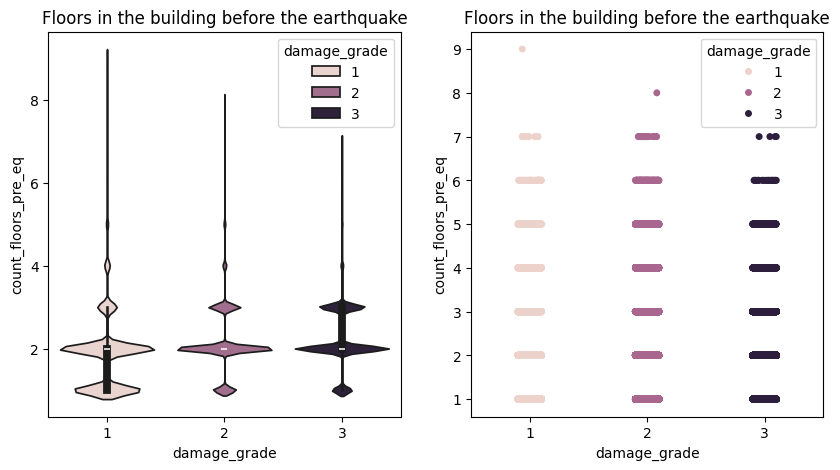

<Figure size 1000x500 with 0 Axes>

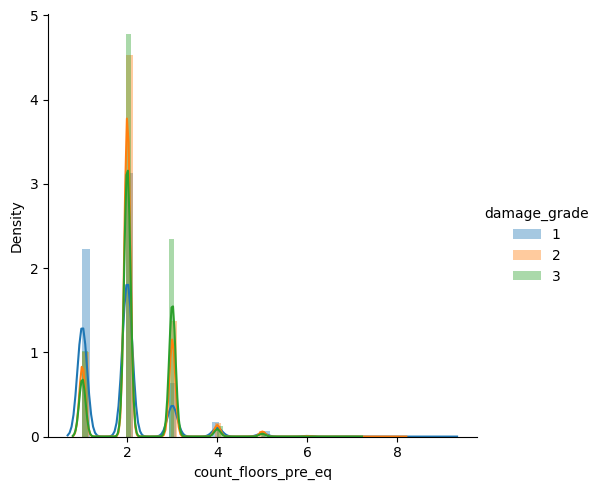

In [19]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
###############################################################
#                      Violin plot                            #
###############################################################

sns.violinplot(data=train,x='damage_grade',y='count_floors_pre_eq',hue='damage_grade',
                   split=False,ax=ax[0])

sns.stripplot(data=train,x='damage_grade',y='count_floors_pre_eq',hue='damage_grade',jitter=True,ax=ax[1])
#plt.ylabel("Company Status",**font)
ax[0].set_title("Floors in the building before the earthquake")
ax[1].set_title("Floors in the building before the earthquake")
plt.show()
###############################################################
#                       Facet Grid                            #
###############################################################
plt.figure(figsize=(10,5))
sns.FacetGrid(train,hue='damage_grade',height=5)\
    .map(sns.distplot,'count_floors_pre_eq')\
    .add_legend()
plt.show()

### ***Families affected due to earthquake ?***

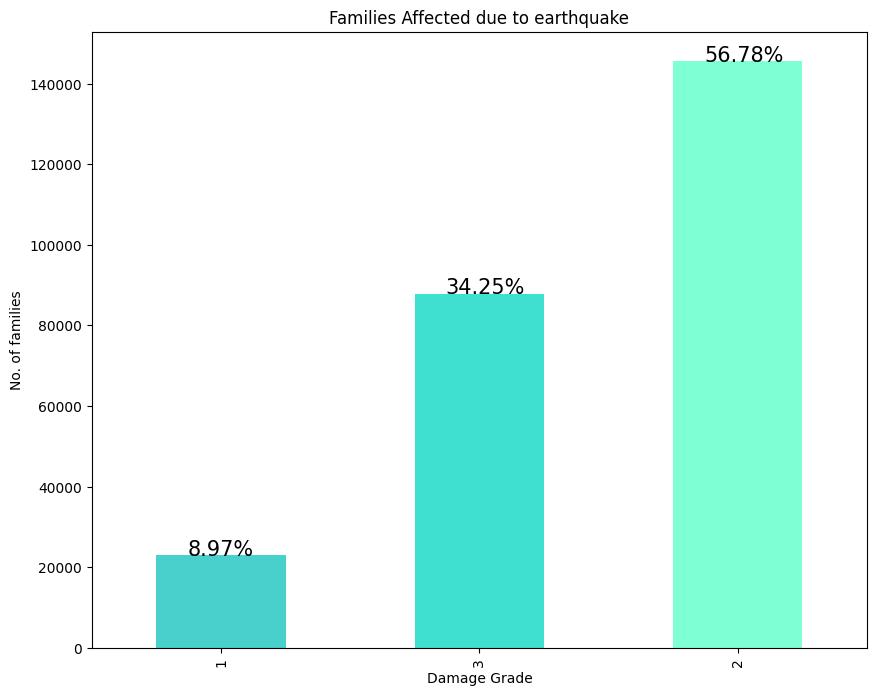

In [20]:
plt.figure(figsize=(10,8))
ax=train.groupby("damage_grade")["count_families"].sum().sort_values().plot.bar(color=["mediumturquoise","turquoise","aquamarine"],)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.title("Families Affected due to earthquake")
plt.ylabel("No. of families")
plt.xlabel("Damage Grade")
plt.show()

- ***OBSERVATIONS***
    - `34.25%` of the families lived in houses which were prone to high damage. Therefore, making them the most exposed group in the population to Critical Health and Financial Damages. 
    - `56.78%` of the families lived in decent houses but were affected the most in the entire population. 
    - `8.97%` of the families lived in well built houses which were able to withstand the earthquake. 

### ***Analyse Categorical Features with respect to Damage Grade ?***

ValueError: The following variable cannot be assigned with wide-form data: `hue`

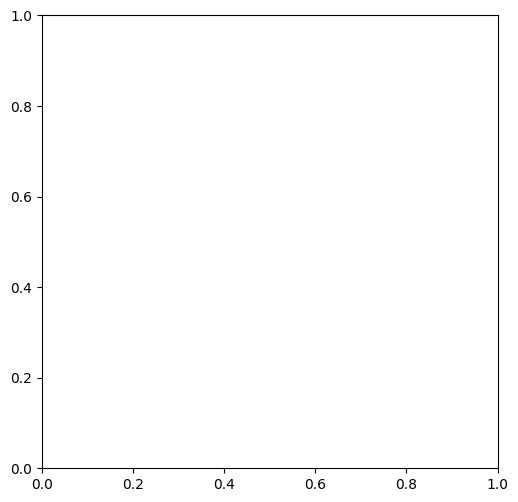

In [23]:
cat_cols=train.select_dtypes(include="object")
font={'weight' : 'bold','size': 16}       
q=1
plt.figure(figsize=(20,20))
for j in cat_cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(train[j].dropna(),palette="Paired",hue=train["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(j)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()

### ***Correlation of independent variables with dependant variable ?***

In [24]:
plt.figure(figsize=(10,10))
cor=train.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")

ValueError: could not convert string to float: 't'

<Figure size 1000x1000 with 0 Axes>

### ***Analyse binary Features with respect to Damage Grade ?***

In [25]:
binary_cols=["has_secondary_use","has_secondary_use_agriculture",
          "has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry",
          "has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"]
for col in binary_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(train[col],hue=train.damage_grade,palette="viridis")
    plt.title(col+ " VS Damage",fontweight="bold")
    plt.legend(["Low damage","Avg damage","High damage"]) 
    plt.show()

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 1500x500 with 0 Axes>

### ***Do we have any outliers in the dataset ?***

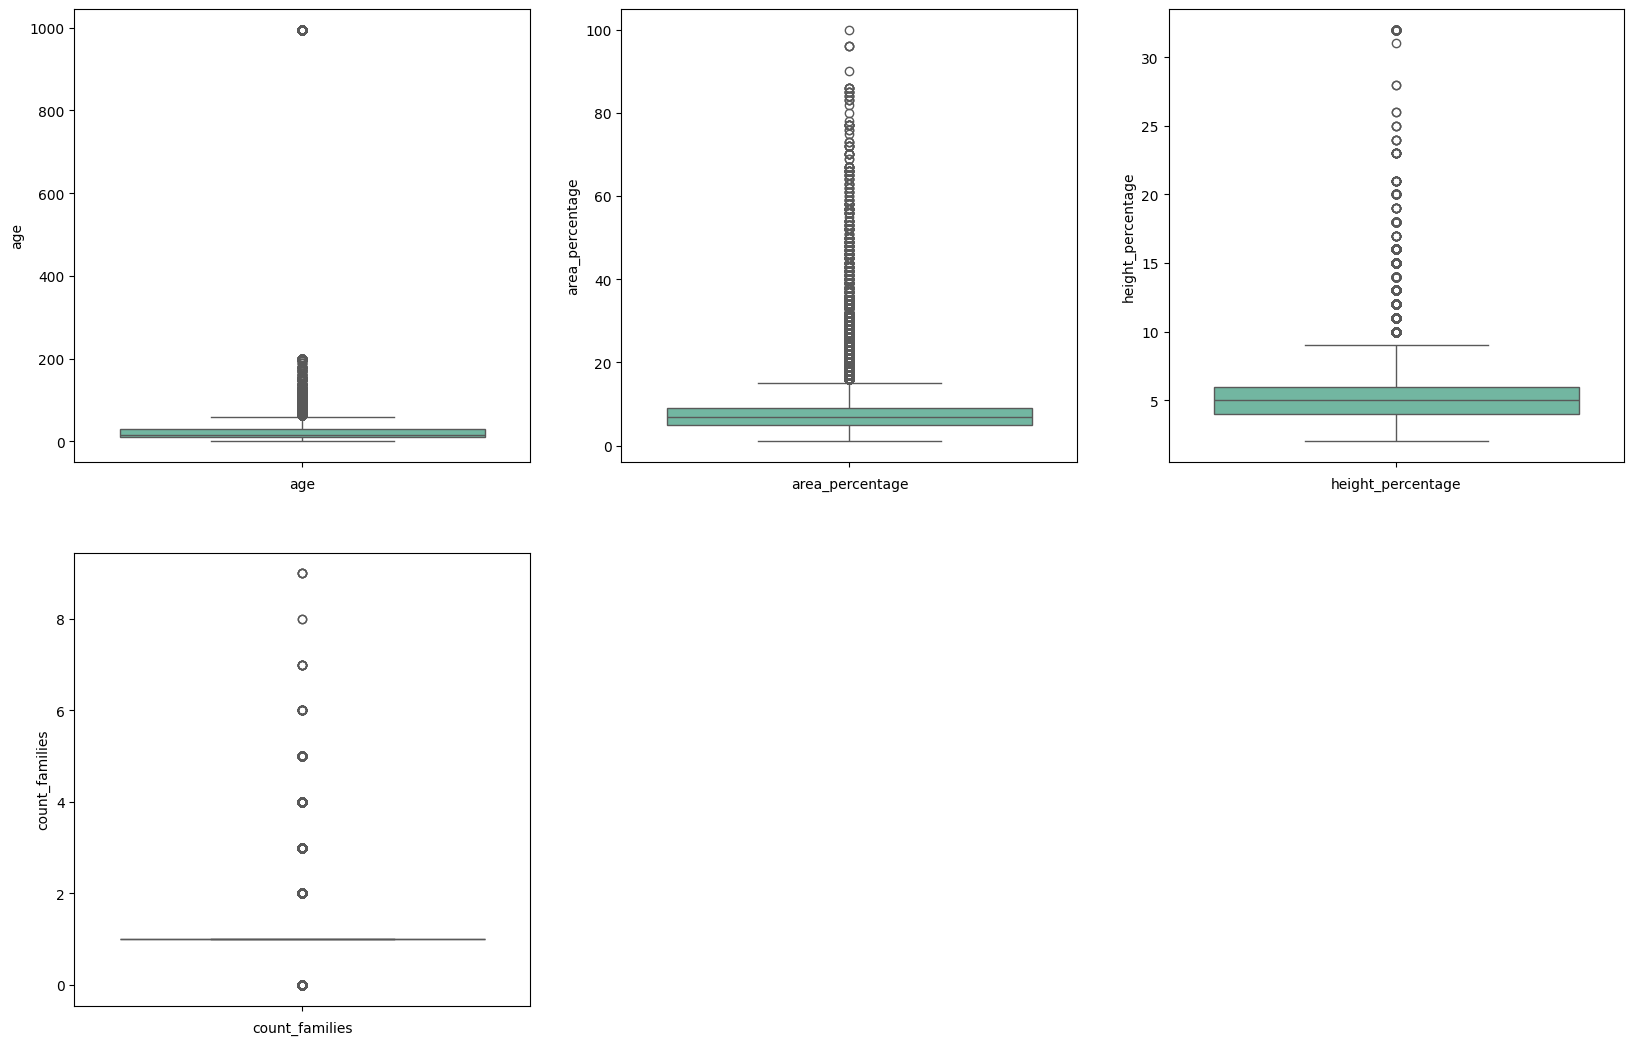

In [26]:
boxplot_cols=["age","area_percentage","height_percentage","count_families"]
q=1
plt.figure(figsize=(20,20))
for j in boxplot_cols:
    plt.subplot(3,3,q)
    ax=sns.boxplot(train[j].dropna(),palette="Set2")
    plt.xlabel(j)
    q+=1
plt.show()

- ***OBSERVATION***
    - boxplots infer that the data consists of many outliers.

### ***Model Building***

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# copying the original dataset into X
X=train
# droping building_id and dependent variable damage_grade
# independant variables
X=X.drop(["damage_grade","building_id"],axis=1)
# dependent variable
y=train["damage_grade"]

In [ ]:
# label encoding the categorical variables
label_encoding_columns=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
# label encoding categorical columns in train dataset 
for i in label_encoding_columns:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes
# label encoding categorical columns in test dataset
for j in label_encoding_columns:
    test[j]=test[j].astype("category")
    test[j]=test[j].cat.codes

### ***Selecting Hyperparameter using Grid Search ?***

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X, y)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

### ***Model : Random Forest***

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [ ]:
rf = RandomForestClassifier(n_estimators = 500,random_state = 1, max_depth=None,n_jobs=-1)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
cm=confusion_matrix(y_test,rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [ ]:
print("-"*100)
print("Accuracy Score for Random Forest :",accuracy_score(y_test,rf_pred))
print("-"*100)
print("\n")
print("classification report for Random Forest :\n\n",classification_report(y_test, rf_pred))
print("-"*100)

In [ ]:
# now predicting on test dataset
test=test.drop("building_id",axis=1)
rf_pred_test=rf.predict(test)

In [ ]:
submission=pd.read_csv("submission_format.csv")
submission=submission.drop("damage_grade",axis=1)
rf_pred_test=pd.DataFrame(rf_pred_test)
submission["damage_grade"]=rf_pred_test
submission.head()

In [ ]:
import pickle

In [ ]:
with open('damage.pkl', 'wb') as f:  # Open a file for writing in binary mode
    pickle.dump(model, f)